# Tarea 3 | Procesamiento de datos masivos
---
* **Luciano Davico**
* **Patsy De Jesús**

## Importamos los datos y librerías

In [2]:
import csv

file_name = 'canastas_tarea_3.csv'

with open(file_name, 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    datos = [tuple(row) for row in reader]

len(datos)

4140

In [3]:
from efficient_apriori import apriori 

## 1. 10 reglas de asociación más relevantes

un programa que imprima en pantalla las 10 reglas de asociación con mayor soporte, siempre   y cuando tengan una confianza mayor a 0.1-.

In [4]:
# Iteramos por niveles de minimo soporte de cada regla
min_conf = 0.11
init_min_sup = 0.01

for i in range(1, 10):
    min_sup = init_min_sup + i * 0.005
    print('min_sup: ', min_sup)
    itemsets, rules = apriori(datos, min_support=min_sup, min_confidence=min_conf)
    print('itemsets: ', len(itemsets))
    print('rules: ', len(rules))
    print('-------------------')
    if len(rules) < 10:
        break


min_sup:  0.015
itemsets:  4
rules:  4130
-------------------
min_sup:  0.02
itemsets:  4
rules:  566
-------------------
min_sup:  0.025
itemsets:  4
rules:  194
-------------------
min_sup:  0.03
itemsets:  3
rules:  96
-------------------
min_sup:  0.035
itemsets:  2
rules:  16
-------------------
min_sup:  0.04
itemsets:  2
rules:  6
-------------------


In [5]:
# Vemos que entre un soporte mínimo de 0.035 y 0.04 pasamos de tener 16 a 6 reglas, por lo que iteramos
for i in range(1, 10):
    min_sup = 0.035 + i * 0.001
    print('min_sup: ', min_sup)
    itemsets, rules = apriori(datos, min_support=min_sup, min_confidence=min_conf)
    print('itemsets: ', len(itemsets))
    print('rules: ', len(rules))
    print('-------------------')
    if len(rules) < 10:
        break

min_sup:  0.036000000000000004
itemsets:  2
rules:  10
-------------------
min_sup:  0.037000000000000005
itemsets:  2
rules:  8
-------------------


Nos quedamos con el nivel óptimo de soporte mínimo, siendo `0.036`

In [6]:
min_sup = 0.036
min_conf = 0.11
itemsets, rules = apriori(datos, min_support=min_sup, min_confidence=min_conf)

for rule in rules:
    print(rule)

{sal} -> {coliflor} (conf: 0.301, supp: 0.036, lift: 2.501, conv: 1.258)
{coliflor} -> {sal} (conf: 0.303, supp: 0.036, lift: 2.501, conv: 1.261)
{vinagre} -> {laurel} (conf: 0.311, supp: 0.037, lift: 3.812, conv: 1.333)
{laurel} -> {vinagre} (conf: 0.459, supp: 0.037, lift: 3.812, conv: 1.625)
{papayas} -> {maíz} (conf: 0.450, supp: 0.044, lift: 3.902, conv: 1.608)
{maíz} -> {papayas} (conf: 0.384, supp: 0.044, lift: 3.902, conv: 1.463)
{zanahorias} -> {plátanos} (conf: 0.462, supp: 0.043, lift: 3.747, conv: 1.628)
{plátanos} -> {zanahorias} (conf: 0.353, supp: 0.043, lift: 3.747, conv: 1.400)
{vinagre} -> {sal} (conf: 0.384, supp: 0.046, lift: 3.163, conv: 1.425)
{sal} -> {vinagre} (conf: 0.380, supp: 0.046, lift: 3.163, conv: 1.420)


In [7]:
len(itemsets)

2

## 2. Cálculo del interés de las reglas

Define el interés de una regla I -> j como la diferencia (S – F) entre el soporte de la regla (S) y la proporción (F) de canastas que contienen j en relación al total de canastas. Escribe un programa que calcule el interés de las 10 reglas que se encontraron en el punto 1-.

In [8]:
def compute_rule_interest(rule, itemsets):
    '''
    Función que calcula el interés de una regla.

    Interés de una regla: soporte de la regla I -> J menos proporcion F de itemsets que 
    contienen j en relacion al total de itemsets
    '''
    rule_support = rule.support
    
    j_support = 0
    itemsets = [set(i) for i in itemsets]
    for itemset in itemsets:
        j_set = set(rule.rhs)
        if j_set.issubset(itemset):
            j_support += 1

    F_ratio = j_support / len(itemsets)
    print(f'Support: {rule_support}, F_ratio: {F_ratio}')
    return rule_support - F_ratio, F_ratio

### Interés de cada regla

In [18]:
# Iteramos por cada regla y calculamos su interés
interests = []
for rule in rules:
    interest, F_ratio = compute_rule_interest(rule, datos)
    print(f'Rule {rule} has interest {interest} and F_ratio {F_ratio}')
    print()
    interests.append((interest, F_ratio, rule, f'{rule.lhs} -> {rule.rhs}'))

Support: 0.03647342995169082, F_ratio: 0.12028985507246377
Rule {sal} -> {coliflor} (conf: 0.301, supp: 0.036, lift: 2.501, conv: 1.258) has interest -0.08381642512077295 and F_ratio 0.12028985507246377

Support: 0.03647342995169082, F_ratio: 0.121256038647343
Rule {coliflor} -> {sal} (conf: 0.303, supp: 0.036, lift: 2.501, conv: 1.261) has interest -0.08478260869565218 and F_ratio 0.121256038647343

Support: 0.03743961352657005, F_ratio: 0.08164251207729468
Rule {vinagre} -> {laurel} (conf: 0.311, supp: 0.037, lift: 3.812, conv: 1.333) has interest -0.04420289855072464 and F_ratio 0.08164251207729468

Support: 0.03743961352657005, F_ratio: 0.12028985507246377
Rule {laurel} -> {vinagre} (conf: 0.459, supp: 0.037, lift: 3.812, conv: 1.625) has interest -0.08285024154589372 and F_ratio 0.12028985507246377

Support: 0.04420289855072464, F_ratio: 0.11521739130434783
Rule {papayas} -> {maíz} (conf: 0.450, supp: 0.044, lift: 3.902, conv: 1.608) has interest -0.07101449275362319 and F_ratio 0

## 3. Discusión

Imagina que el supermercado tiene un plan en el que solo puede tomar acción en base a dos reglas en particular. De las 10 reglas que se imprimieron, analiza y selecciona las dos reglas que consideres más beneficiosas para el supermercado. Explica las razones por las que crees que estas dos reglas pueden tener un mayor impacto y cómo podrían ayudar al supermercado en su estrategia de ventas o toma de decisiones.

### Respuesta

Dados los datos de interés y otras métricas de cada regla que hemos obtenido, podemos analizar la relevancia de ciertas métricas que prevalezcan para la elección de reglas.

En primer lugar, podemos ver primero pensar en considerar las reglas que tengan una mayor confianza. Para este caso, quizás la confianza podría no ser un indicador tan decisivo, dado que podría darse el caso que el elemento de la derecha sea muy frecuente en el total de las canastas, lo cual daría una confianza alta. Para lo anterior, podemos combinarla con el dato de la proporción `F`, el cual nos indica justamente la proporción de casos en que `j` está contenido en todas las canastas.

Con lo anterior, podemos hacer un primer descarte, solo considerando los ítemes que tengan alta confianza y baja proporción F.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


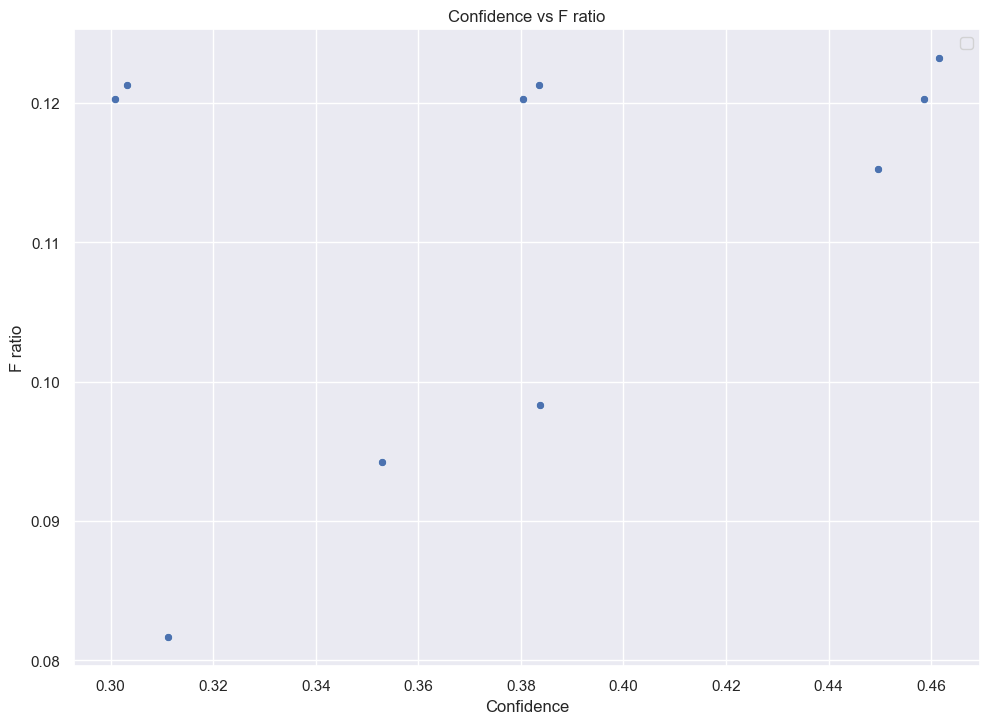

In [31]:
import seaborn as sns

# Graficamos confianza versus proporción F
ax = sns.scatterplot(x=[interest[2].confidence for interest in interests], y=[interest[1] for interest in interests])
ax.set_title('Confidence vs F ratio')
ax.set_xlabel('Confidence')
ax.set_ylabel('F ratio')
ax.legend()

Para lo anterior, se logra ver con claridad que todos los ítemes de la derecha de cada regla tienen una proporción `F` baja, entre `0.08` y `0.12` aproximadamente, pero la confianza de las reglas tiene una variación más importante, entre 30% y 50%. Se puede entonces ver que en nuestras 10 reglas de asociación, el elemento de la derecha es poco común que aparezca en las compras, estando como máximo en un 13% de las compras. Dicho eso, a modo de interpretar, podemos comentar que **en todas nuestras reglas, el nuevo producto a "ofrecer" es un producto poco común**. Con lo anterior, entonces la elección de las mejores reglas se toma en base a aquellas que tengan la mayor probabilidad estimada de que el usuario "eche" cierto producto a su canasta, dado otros elementos ya existentes en su carro. Para lo anterior entonces **consideraremos las reglas con mayor confianza**, escogiendo así las canastas de más a la derecha.

En el código siguiente observamos cuales son dichas reglas.

In [36]:
max_confidence_rules = sorted(interests, key=lambda x: x[2].confidence, reverse=True)[:2]
for rule in max_confidence_rules:
    print(rule[2], f'Interest: {rule[0]}, F_ratio: {rule[1]}')

{zanahorias} -> {plátanos} (conf: 0.462, supp: 0.043, lift: 3.747, conv: 1.628) Interest: -0.07971014492753624, F_ratio: 0.12318840579710146
{laurel} -> {vinagre} (conf: 0.459, supp: 0.037, lift: 3.812, conv: 1.625) Interest: -0.08285024154589372, F_ratio: 0.12028985507246377


Luego, nos quedamos entonces con las reglas `{zanahorias} -> {plátanos}` y `{laurel} -> {vinagre}`.